## 【問題１】

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as patches

In [2]:
def scratch_train_test_split(X, y, train_size=0.8,):
    """
    検証用データを分割する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, )
      正解値
    train_size : float (0<train_size<1)
      何割をtrainとするか指定

    Returns
    ----------
    X_train : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    X_test : 次の形のndarray, shape (n_samples, n_features)
      検証データ
    y_train : 次の形のndarray, shape (n_samples, )
      学習データの正解値
    y_test : 次の形のndarray, shape (n_samples, )
      検証データの正解値
    """
    #ここにコードを書く

    list = random.sample(range(X.shape[0]), k = int(X.shape[0]* train_size))
    list.sort()
    X_train = np.delete(X, list, axis=0)
    X_test = X[list]
    y_train = np.delete(y, list, axis=0)
    y_test = y[list]

    return X_train, X_test, y_train, y_test

## 【問題２】

In [79]:
# データセット０
from sklearn.datasets import load_iris
data = load_iris()
data0 = pd.DataFrame(data["data"],columns=data["feature_names"])
data_target = pd.DataFrame(data["target"], columns=["species"])
data0 = pd.concat([data0,data_target], axis = 1)
data0 = data0.query("not species==0")  #1:'versicolor', 2:'virginica'

X0 = data0.iloc[:,0:4].values
y0 = data0.iloc[:,4].values
y0 = y0 - 1                            #0:'versicolor', 1:'virginica'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [121]:
# データセット１
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X1 = np.concatenate((f0, f1))
y1 = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1)))

random_index = np.random.permutation(np.arange(n_samples))
X1 = X1[random_index]
y1 = y1[random_index]



In [82]:
# データセット２
X2 = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [90]:
data_set_X = [X0,X1,X2] 
data_set_y = [y0,y1,y2]

In [153]:
# ロジスティック回帰
from sklearn import linear_model
from sklearn.metrics import accuracy_score
clf = linear_model.SGDClassifier(loss="log")

for i in range(3):
    X_train,X_test,y_train,y_test = scratch_train_test_split(data_set_X[i], data_set_y[i], train_size=0.2)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ac_score = accuracy_score(y_test, y_pred)
    print("予測結果：{}".format(y_pred))
    print("正答率：{}".format(ac_score))

予測結果：[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1]
正答率：0.85
予測結果：[ 1  1 -1 -1 -1 -1  1 -1 -1  1  1  1 -1  1  1  1  1 -1  1  1  1 -1  1  1
 -1  1  1 -1  1  1 -1  1 -1 -1  1 -1 -1  1  1 -1  1  1 -1  1 -1  1 -1 -1
 -1  1 -1 -1  1  1 -1  1 -1  1 -1  1  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1
  1 -1 -1  1 -1  1  1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]
正答率：1.0
予測結果：[0 1 1 0 1 1 0 1]
正答率：0.375


In [156]:
# ＳＶＭ
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC(gamma = "auto")

for i in range(3):
    X_train,X_test,y_train,y_test = scratch_train_test_split(data_set_X[i], data_set_y[i], train_size=0.2)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ac_score = accuracy_score(y_test, y_pred)
    print("予測結果：{}".format(y_pred))
    print("正答率：{}".format(ac_score))

予測結果：[0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1]
正答率：0.9
予測結果：[-1 -1  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1
  1 -1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1 -1  1 -1
  1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1 -1 -1 -1 -1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1  1
  1 -1  1 -1]
正答率：1.0
予測結果：[0 1 1 0 0 1 1 0]
正答率：0.375


In [169]:
# ＤＴＣ
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()

for i in range(3):
    X_train,X_test,y_train,y_test = scratch_train_test_split(data_set_X[i], data_set_y[i], train_size=0.2)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    ac_score = accuracy_score(y_test, y_pred)
    print("予測結果：{}".format(y_pred))
    print("正答率：{}".format(ac_score))

予測結果：[0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1]
正答率：0.9
予測結果：[ 1 -1  1 -1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1  1 -1  1 -1  1
  1 -1 -1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1 -1  1 -1
 -1  1 -1 -1 -1  1  1  1 -1  1  1  1  1  1 -1 -1  1 -1  1  1  1 -1  1  1
  1 -1  1  1 -1  1  1  1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1  1  1
 -1  1 -1 -1]
正答率：1.0
予測結果：[0 1 1 0 1 1 0 1]
正答率：0.5


## 【問題３】

In [208]:
import pandas as pd
aims_data = pd.read_csv("train.csv")
aims_data = aims_data[["GrLivArea","YearBuilt","SalePrice"]]
X_aims = aims_data[["GrLivArea","YearBuilt"]].values
y_aims = aims_data.SalePrice.values

In [267]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)

X_train,X_test,y_train,y_test = scratch_train_test_split(X_aims, y_aims, train_size=0.2)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("予測結果：{}".format(y_pred[0:10]))    # 予測結果は10サンプルまでの表示。
print("MSE：{}".format(mean_squared_error(y_test,y_pred)))


予測結果：[1.91008967e+15 1.94637054e+15 1.92296108e+15 1.86180174e+15
 1.96098877e+15 1.96169074e+15 1.90737012e+15 1.94704911e+15
 1.82283836e+15 1.82667353e+15]
MSE：3.5933730113880293e+30


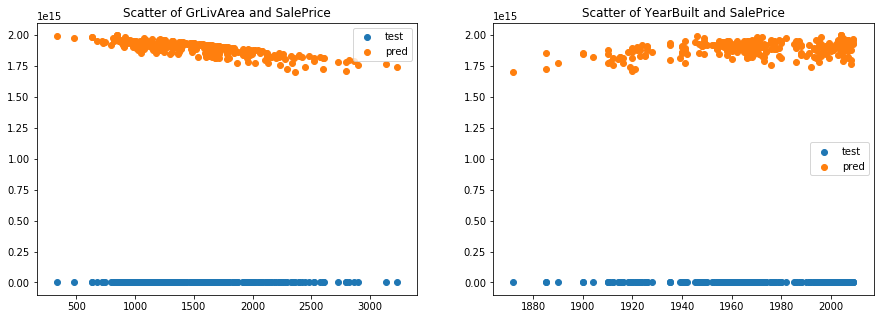

In [268]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title( "Scatter of GrLivArea and SalePrice")
plt.scatter(X_test[:,0],y_test,label="test")
plt.scatter(X_test[:,0],y_pred,label="pred")
plt.legend()

plt.subplot(1,2,2)
plt.title( "Scatter of YearBuilt and SalePrice")
plt.scatter(X_test[:,1],y_test,label="test")
plt.scatter(X_test[:,1],y_pred,label="pred")
plt.legend()
plt.show()

## 　＊SGDRegressorのモデルでは、予測値が桁違いに大きく計算されてしまう。（他のモデルだと問題ないようだが）